# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from inauguralproject import ExchangeEconomyClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

[0.08108108108108109, 0.08108108108108109, 0.0945945945945946, 0.0945945945945946, 0.0945945945945946, 0.0945945945945946, 0.0945945945945946, 0.0945945945945946, 0.0945945945945946, 0.10810810810810811, 0.10810810810810811, 0.10810810810810811, 0.10810810810810811, 0.10810810810810811, 0.10810810810810811, 0.10810810810810811, 0.10810810810810811, 0.10810810810810811, 0.10810810810810811, 0.10810810810810811, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.12162162162162163, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514, 0.13513513513513514

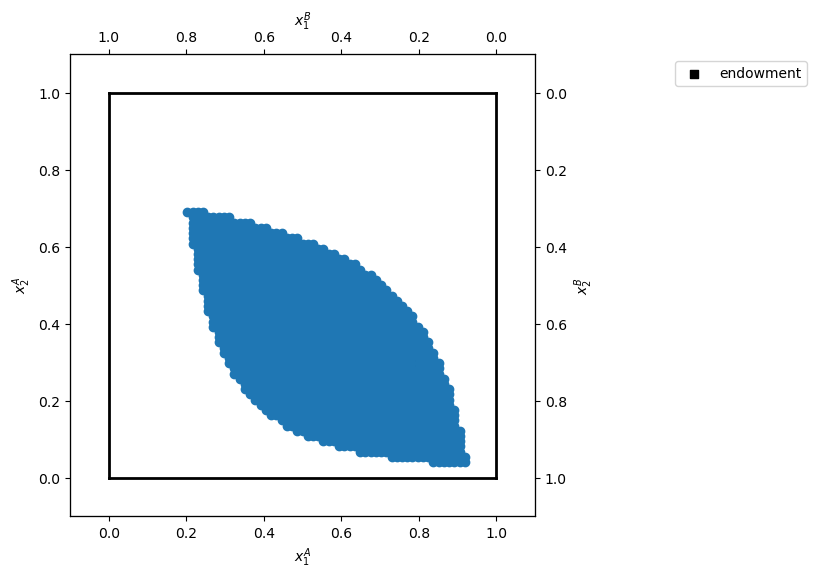

In [122]:
# code for solving the model (remember documentation and comments)

EEC = ExchangeEconomyClass()

N = 75

# Initializing for A

x1A_vec = np.linspace(0,1,N)
x2A_vec = np.linspace(0,1,N)
uA_endowment = EEC.utility_A(EEC.par.w1A, EEC.par.w2A)


# Initializing for B
        
x1B_vec = np.linspace(0,1,N)
x2B_vec = np.linspace(0,1,N)
uB_endowment = EEC.utility_B(EEC.par.w1B, EEC.par.w2B)

#print(x1_vec)
#print(x2_vec)
#print(u_vec)

# Making a new matrix that contains all the values the satisfy constraints.

x1A_edgeworth = []
x2A_edgeworth = []

for x1A in x1A_vec:
    for x2A in x2A_vec:
        if EEC.utility_A(x1A, x2A) >= uA_endowment and EEC.utility_B(1-x1A, 1-x2A) >= uB_endowment:
                x1A_edgeworth.append(x1A)
                x2A_edgeworth.append(x2A)


print(x1A_edgeworth)
print(x2A_edgeworth)


# Plotting

par = EEC.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));


plt.scatter(x1A_edgeworth, x2A_edgeworth)








# Question 2

Explain your code and procedure

[0.31666666666666665, 1.2666666666666668]


# Question 3

Explain your code and procedure

In [ ]:
# code

ADD CONCISE CONLUSION.